## Importing required libraries

In [200]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and understanding the data

In [201]:
#Importing dataset
df = pd.read_csv("day.csv")

In [202]:
#Checking the head of data set
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of dataset

In [203]:
df.shape

(730, 16)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [205]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2:  Data  preparation and Visualising the Data

In [206]:
### checking null values
round(100*(df.isnull().sum()/len(df.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Observation
- No null values are present

In [207]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [208]:
df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [209]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [210]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [211]:
####mapping categorical variable which can be usefull for easy story telling
def map_season(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df[['season']] = df[['season']].apply(map_season)
#df2.season = df2.season.apply(season_map)

def map_weather(x):
    return x.map({1:'clear',2:'mist',3:'light_snow',4:'Heavy_rain'})
df[['weathersit']] = df[['weathersit']].apply(map_weather)

def map_mnth(x):
    return x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df[['mnth']] = df[['mnth']].apply(map_mnth) 

#### mapping as per real date 01-01-2018 as Monday
def map_weekday(x):
    return x.map({5:'sun',6:'mon',0:'tue',1:'wed',2:'thu',3:'fri',4:'sat'})
df[['weekday']] = df[['weekday']].apply(map_weekday)

### Dropping features not useful for analysis
#### instant, registered, casual,atemp,dteday 
- registered and casual are random and we are not trying to predict these 
- atemp as per data dictionary looks to be derived from temp.
- instant is just a index
- dteday is not significant as we have month/day already in the dataset


In [212]:
df.drop(['atemp','instant','casual', 'registered','dteday'], axis =1, inplace = True)

In [213]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


#### Visualising Categorical Variables

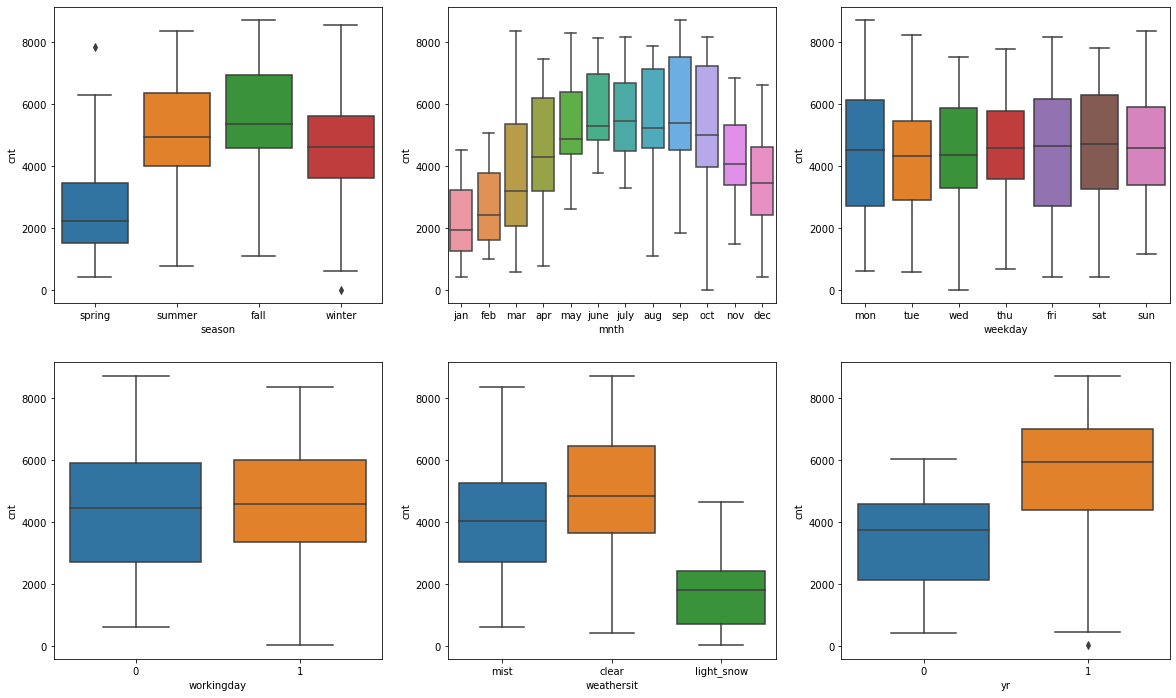

In [214]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

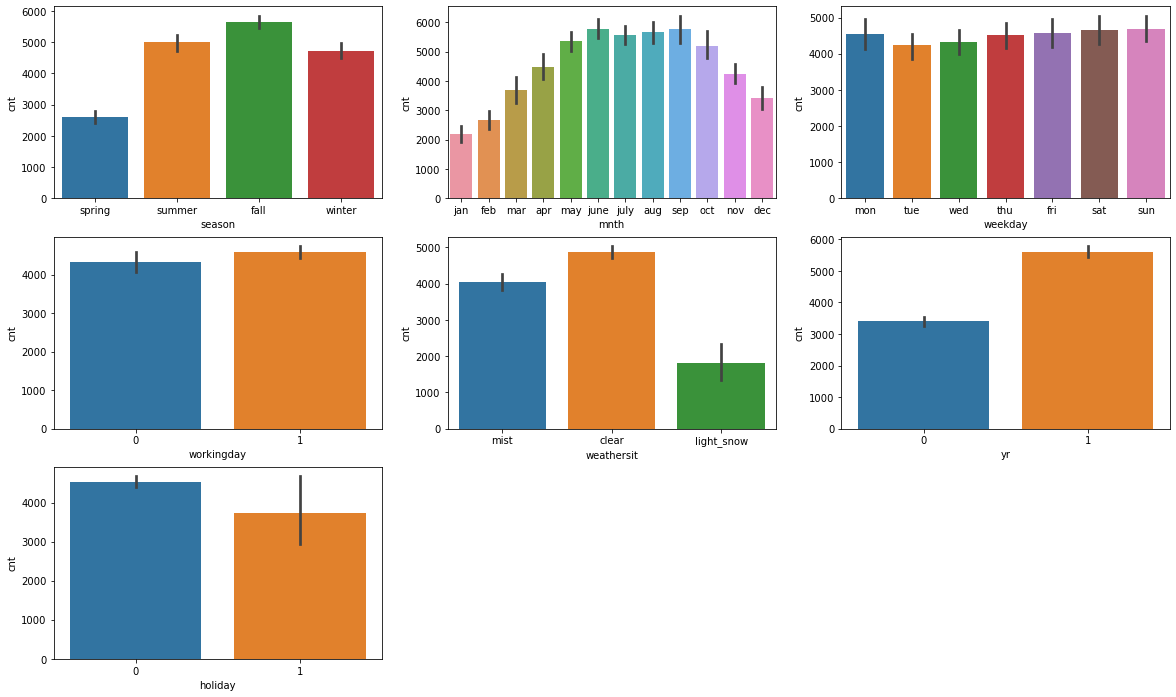

In [215]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.barplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.barplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.barplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.barplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.barplot(x = 'holiday', y = 'cnt', data = df)
plt.show()


#### Observation
- 2nd yr i.e., 2019 have higher bike rentals comparatively
- Good weathersit have higher bike rentals
- season fall have higher bike rentals
- months from june to september have higher bike rentals
- holidays have lesser bike rentals
- working day have higher bike rentals marginally

<AxesSubplot:ylabel='windspeed'>

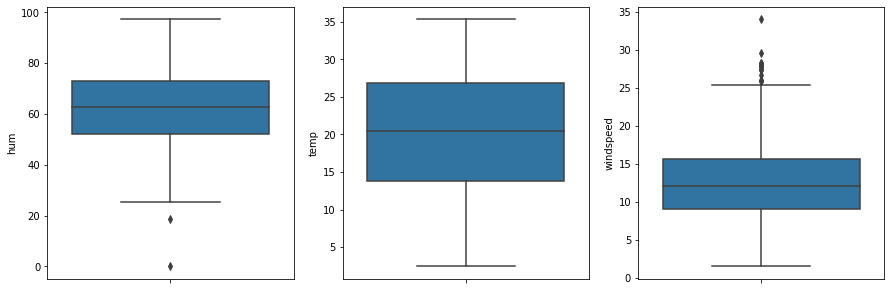

In [216]:
#Checking for any outliers if any outlier treatment is required
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y =df.hum, data = df)
plt.subplot(1,3,2)
sns.boxplot(y =df.temp, data = df)
plt.subplot(1,3,3)
sns.boxplot(y =df.windspeed, data = df)


#### Observation
- No outlier treatment is required for continuous variables

In [217]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


#### Visualising Numeric Variables

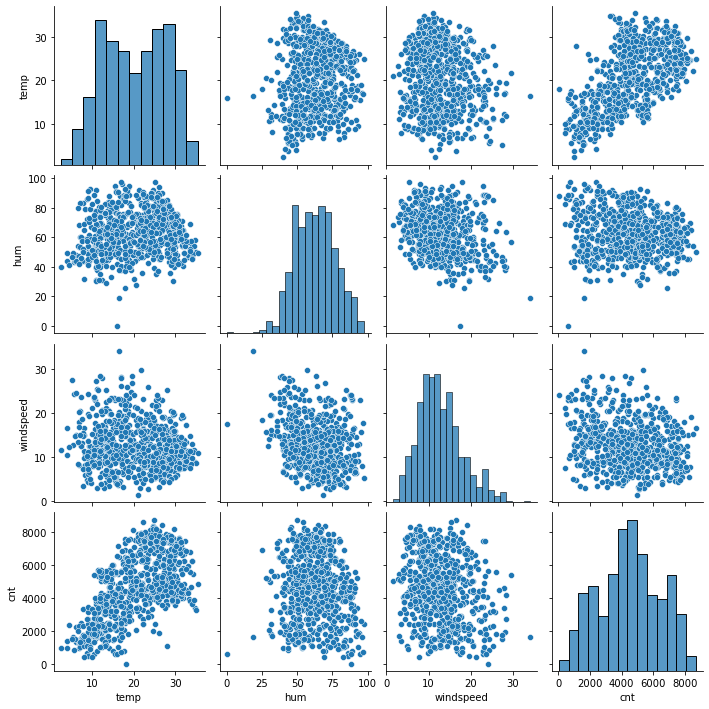

In [218]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

#### Observation
- cnt feature have linear relationship with temp, windspeed

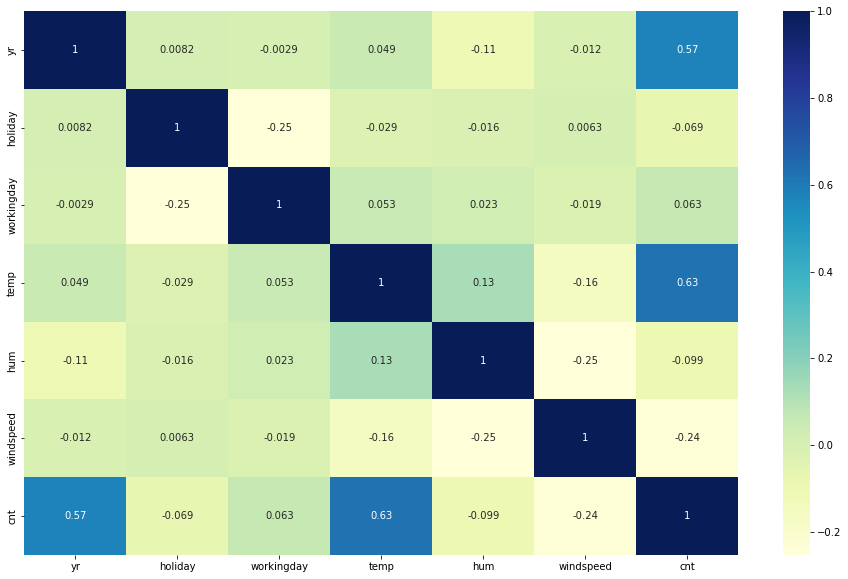

In [219]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation
- target variable 'cnt' is correlated on higher side with temp, yr, month, windspeed(descending order of correlation)

### Dummy variables

In [220]:
# Get the dummy variables for the feature 'season', 'weathersit' etc., and store it in a new variable
dummy_season = pd.get_dummies(df[[ 'season']],drop_first = True)
dummy_weathersit = pd.get_dummies(df[[ 'weathersit']],drop_first = True)
dummy_mnth = pd.get_dummies(df[[ 'mnth']],drop_first = True)
dummy_weekday = pd.get_dummies(df[[ 'weekday']],drop_first = True)
#one_hot_encoded_data.shape
frames = [df,dummy_weathersit,dummy_mnth,dummy_weekday,dummy_season]
df1 = pd.concat(frames, axis=1)

In [221]:
df1.shape

(730, 33)

In [222]:
### dropping the categorical var as dummies are created
df1.drop(['weathersit', 'season','mnth','weekday'], axis =1 , inplace = True)

In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   weathersit_light_snow  730 non-null    uint8  
 8   weathersit_mist        730 non-null    uint8  
 9   mnth_aug               730 non-null    uint8  
 10  mnth_dec               730 non-null    uint8  
 11  mnth_feb               730 non-null    uint8  
 12  mnth_jan               730 non-null    uint8  
 13  mnth_july              730 non-null    uint8  
 14  mnth_june              730 non-null    uint8  
 15  mnth_m

## Step 3: Splitting the Data into Training and Testing Sets



In [225]:
from sklearn.model_selection import train_test_split

df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [226]:
df1_train.shape

(510, 29)

In [227]:
df1_test.shape

(219, 29)

In [228]:
df1.shape

(730, 29)

In [229]:
df1_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_light_snow,weathersit_mist,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,1,0,...,0,1,0,0,0,0,0,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,1,0


### Rescaling the Features 


In [230]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
scaler = MinMaxScaler()

In [232]:
num_vars = ['temp','hum','windspeed','cnt']

df1_train[num_vars] = scaler.fit_transform(df1_train[num_vars])

In [233]:
df1_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_light_snow,weathersit_mist,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,...,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,1,0


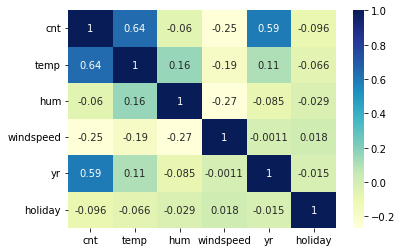

In [234]:
#plt.figure(figsize = (20, 20))
# Let's check the correlation coefficients of few non dummy variable created feature columns to see which variables are highly correlated

sns.heatmap(df1_train[['cnt','temp','hum', 'windspeed','yr', 'holiday']].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation
- Cnt have high correlation with yr,temp,windspeed

### Dividing into X and Y sets for model building

In [235]:
y_train = df1_train.pop('cnt')
X_train = df1_train

In [236]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 4: Building a linear model

#### Adding variables to build a model

In [237]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
#X_train_lm
print(lr.params)
print(lr.summary())

const    0.169798
temp     0.639952
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.80e-61
Time:                        20:03:40   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

#### Adding other feature variables as well to build the model

In [238]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp', 'yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
#X_train_lm
print(lr.params)
print(lr.summary())

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.25e-130
Time:                        20:03:41   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [239]:
### adding few more features
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','windspeed']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
#X_train_lm
print(lr.params)
print(lr.summary())

const        0.157022
temp         0.555578
yr           0.238494
windspeed   -0.196438
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.84e-136
Time:                        20:03:42   Log-Likelihood:                 355.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     506   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### Observation
- All 3 variables added are significant as p values < 5% and F-statistic is higher with Prob(F-statistic) lower

### Adding all the variables to the model

In [240]:
df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [241]:

import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()
#X_train_lm
print(lr_1.params)
print(lr_1.summary())

const                    0.242930
yr                       0.232116
holiday                  0.006726
workingday               0.093651
temp                     0.450562
hum                     -0.151340
windspeed               -0.186453
weathersit_light_snow   -0.257443
weathersit_mist         -0.061066
mnth_aug                 0.014404
mnth_dec                -0.045586
mnth_feb                -0.032282
mnth_jan                -0.062777
mnth_july               -0.040350
mnth_june               -0.002972
mnth_mar                 0.001045
mnth_may                 0.023940
mnth_nov                -0.041851
mnth_oct                 0.007534
mnth_sep                 0.081060
weekday_mon              0.098544
weekday_sat             -0.003849
weekday_sun              0.005388
weekday_thu             -0.013502
weekday_tue              0.044008
weekday_wed             -0.015519
season_spring           -0.048159
season_summer            0.038725
season_winter            0.105847
dtype: float64

#### Observation:
Looking at the p-values, it looks like some of the variables aren't really significant

We could simply drop the variable with the highest p value. A better way would be to supplement this with the VIF information. 

## Checking VIF

In [242]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [243]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
#calculate VIF of variables

def findVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

findVIF(X_train)

,Features,VIF
2,workingday,86.81
19,weekday_mon,19.72
23,weekday_tue,18.35
25,season_spring,10.79
27,season_winter,9.50
26,season_summer,8.29
3,temp,7.12
16,mnth_nov,6.80
17,mnth_oct,6.59
8,mnth_aug,6.43


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop to reduce the multicollinearity. VIF< 5 is acceptable 

#### We can drop few variables which have high p value. We will use RFE to select feature columns


### RFE based selecting feature columns

In [244]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [245]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [246]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 8),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [247]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_jan', 'mnth_july',
       'mnth_sep', 'weekday_mon', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [248]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_june', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [249]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [250]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_new = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_new).fit()   # Running the linear model
print(lm.params)
print(lm.summary())

const                    0.251042
yr                       0.230502
holiday                 -0.058529
workingday               0.043521
temp                     0.509836
hum                     -0.154716
windspeed               -0.185956
weathersit_light_snow   -0.248777
weathersit_mist         -0.057824
mnth_jan                -0.034326
mnth_july               -0.053193
mnth_sep                 0.081186
weekday_mon              0.053721
season_spring           -0.050806
season_summer            0.049660
season_winter            0.094426
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        20:04:27   Log-Li

#### Observation
- mnth_jan has high p value comparatively

In [251]:
# Calculate the VIFs again for the new model

findVIF(X_train_rfe)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,season_spring,4.53
14,season_winter,3.48
13,season_summer,2.84
7,weathersit_mist,2.29
0,yr,2.09
11,weekday_mon,1.98


In [252]:
## Dropping variable based on p value and VIF

X_train_new = X_train_rfe.drop(['mnth_jan'],axis =1)

In [254]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_new = sm.add_constant(X_train_new)
lm_1 = sm.OLS(y_train,X_train_rfe_new).fit()   # Running the linear model
print(lm_1.params)
print(lm_1.summary())

const                    0.239379
yr                       0.229738
holiday                 -0.059434
workingday               0.043216
temp                     0.527819
hum                     -0.159467
windspeed               -0.180601
weathersit_light_snow   -0.246332
weathersit_mist         -0.057847
mnth_july               -0.054881
mnth_sep                 0.081773
weekday_mon              0.053203
season_spring           -0.055434
season_summer            0.052613
season_winter            0.100294
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.13e-191
Time:                        20:05:05   Log-Likelihood:                 517.87
N

In [255]:
findVIF(X_train_new)

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
11,season_spring,4.24
13,season_winter,3.44
12,season_summer,2.83
7,weathersit_mist,2.28
0,yr,2.08
10,weekday_mon,1.97


#### Removing few variables manually for eliminating multicollinearity in the feature variables simultaneously checking on the model accuracy. Removing few feature variables, model accuracy is affected so removing carefully

In [256]:
X_train_new_1 = X_train_new.drop(['hum'], axis =1)


In [257]:
import statsmodels.api as sm  
X_train_rfe_new = sm.add_constant(X_train_new_1)
lm_2 = sm.OLS(y_train,X_train_rfe_new).fit()   # Running the linear model
print(lm_2.params)
print(lm_2.summary())

const                    0.157668
yr                       0.233626
holiday                 -0.057148
workingday               0.046259
temp                     0.492017
windspeed               -0.149124
weathersit_light_snow   -0.290444
weathersit_mist         -0.083515
mnth_july               -0.049971
mnth_sep                 0.075781
weekday_mon              0.058008
season_spring           -0.065288
season_summer            0.046496
season_winter            0.085870
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.73e-189
Time:                        20:05:23   Log-Likelihood:                 508.65
No. Observations:                 5

In [259]:
# Calculate the VIFs again for the new model

findVIF(X_train_new_1)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,season_spring,2.49
11,season_summer,2.32
0,yr,2.07
12,season_winter,1.99
9,weekday_mon,1.96
7,mnth_july,1.58
6,weathersit_mist,1.56


In [260]:
# Dropping holiday as per p value before dropping w.r.t VIF to see if VIF decreases 
X_train_new_2 = X_train_new_1.drop(['holiday'], axis =1)


In [261]:
import statsmodels.api as sm  
X_train_rfe_new_1 = sm.add_constant(X_train_new_2)
lm_3 = sm.OLS(y_train,X_train_rfe_new_1).fit()   # Running the linear model
print(lm_3.params)
print(lm_3.summary())

const                    0.149280
yr                       0.233807
workingday               0.054735
temp                     0.492470
windspeed               -0.149998
weathersit_light_snow   -0.289240
weathersit_mist         -0.082998
mnth_july               -0.048914
mnth_sep                 0.073841
weekday_mon              0.066577
season_spring           -0.066220
season_summer            0.046893
season_winter            0.085092
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.28e-189
Time:                        20:06:12   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                         

In [262]:
# Calculate the VIFs again for the new model

findVIF(X_train_new_2)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
9,season_spring,2.38
10,season_summer,2.31
0,yr,2.07
11,season_winter,1.92
8,weekday_mon,1.83
6,mnth_july,1.58
5,weathersit_mist,1.56


In [263]:
# Dropping variable as per p value before dropping w.r.t VIF to see if VIF decreases 
X_train_new_3 = X_train_new_2.drop(['mnth_july'], axis =1)


In [264]:
import statsmodels.api as sm  
X_train_rfe_new_2 = sm.add_constant(X_train_new_3)
lm_4 = sm.OLS(y_train,X_train_rfe_new_2).fit()   # Running the linear model
print(lm_4.params)
print(lm_4.summary())

const                    0.140538
yr                       0.234322
workingday               0.055691
temp                     0.479972
windspeed               -0.150066
weathersit_light_snow   -0.290193
weathersit_mist         -0.081726
mnth_sep                 0.087175
weekday_mon              0.066892
season_spring           -0.055103
season_summer            0.061539
season_winter            0.097174
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.86e-189
Time:                        20:07:05   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:           

In [265]:
# Calculate the VIFs again for the new model

findVIF(X_train_new_3)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
8,season_spring,2.30
0,yr,2.07
9,season_summer,1.99
7,weekday_mon,1.83
10,season_winter,1.77
5,weathersit_mist,1.56
6,mnth_sep,1.23


In [266]:
# Dropping variable as per p value before dropping w.r.t VIF to see if VIF decreases 
X_train_new_4 = X_train_new_3.drop(['season_spring'], axis =1)


In [267]:
import statsmodels.api as sm  
X_train_rfe_new_3 = sm.add_constant(X_train_new_4)
lm_5 = sm.OLS(y_train,X_train_rfe_new_3).fit()   # Running the linear model
print(lm_5.params)
print(lm_5.summary())

const                    0.075325
yr                       0.233056
workingday               0.056323
temp                     0.549936
windspeed               -0.155238
weathersit_light_snow   -0.288021
weathersit_mist         -0.081347
mnth_sep                 0.097236
weekday_mon              0.067688
season_summer            0.087429
season_winter            0.131826
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.47e-188
Time:                        20:08:02   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:              

In [268]:
# Calculate the VIFs again for the new model

findVIF(X_train_new_4)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_mon,1.69
8,season_summer,1.57
5,weathersit_mist,1.53
9,season_winter,1.40
6,mnth_sep,1.20
4,weathersit_light_snow,1.08


#### Observation
- Though VIF and p values are satisfying the requirement. error terms were not having mean =0. so dropping few insignificant feature variables

In [272]:
# Dropping variable as per p value before dropping w.r.t VIF to see if VIF decreases 
X_train_new_5 = X_train_new_4.drop(['workingday'], axis =1)


In [273]:
import statsmodels.api as sm  
X_train_rfe_new_4 = sm.add_constant(X_train_new_5)
lm_6 = sm.OLS(y_train,X_train_rfe_new_4).fit()   # Running the linear model
print(lm_6.params)
print(lm_6.summary())

const                    0.117890
yr                       0.233595
temp                     0.553650
windspeed               -0.157494
weathersit_light_snow   -0.280215
weathersit_mist         -0.078238
mnth_sep                 0.097686
weekday_mon              0.022733
season_summer            0.088483
season_winter            0.129269
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.09e-184
Time:                        20:11:09   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     500   BIC:                            -910.6
Df Model:    

In [279]:
# Calculate the VIFs again for the new model

findVIF(X_train_new_5)

,Features,VIF
1,temp,3.70
2,windspeed,3.09
0,yr,2.00
7,season_summer,1.56
4,weathersit_mist,1.48
8,season_winter,1.37
5,mnth_sep,1.20
6,weekday_mon,1.18
3,weathersit_light_snow,1.08


In [282]:
# Dropping variable as per p value before dropping w.r.t VIF to see if VIF decreases 
X_train_new_6 = X_train_new_5.drop(['weekday_mon'], axis =1)


In [283]:
import statsmodels.api as sm  
X_train_rfe_new_5 = sm.add_constant(X_train_new_6)
lm_7 = sm.OLS(y_train,X_train_rfe_new_5).fit()   # Running the linear model
print(lm_7.params)
print(lm_7.summary())

const                    0.121392
yr                       0.233108
temp                     0.552725
windspeed               -0.155260
weathersit_light_snow   -0.279492
weathersit_mist         -0.078044
mnth_sep                 0.097698
season_summer            0.088176
season_winter            0.129402
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.04e-185
Time:                        20:16:42   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8          

In [284]:
# Calculate the VIFs again for the new model

findVIF(X_train_new_6)

,Features,VIF
1,temp,3.68
2,windspeed,3.03
0,yr,2.00
6,season_summer,1.56
4,weathersit_mist,1.47
7,season_winter,1.37
5,mnth_sep,1.20
3,weathersit_light_snow,1.08


## Step 5: Residual Analysis of the train data

In [286]:
y_train_pred = lm_7.predict(X_train_rfe_new_5)

Text(0.5, 0, 'Errors')

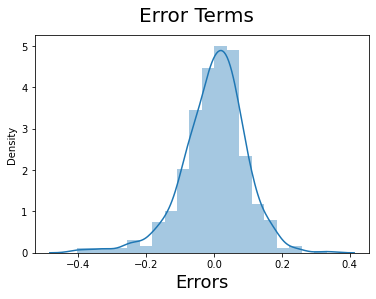

In [287]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- After removal of 2 additional feature variables,now error terms are normally distributed with mean=0 satisfying the assumption of linear regression

## Step 6: Making Predictions Using the Final Model

#### Applying the scaling on the test sets
#### only transform on the test set and 
#### fit and transform only on the training data set

In [288]:
num_vars = ['temp','hum','windspeed','cnt']

df1_test[num_vars] = scaler.transform(df1_test[num_vars])

In [289]:
df1_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_light_snow,weathersit_mist,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.027397,0.319635,0.059361,...,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.163612,0.467403,0.236840,...,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [290]:
y_test = df1_test.pop('cnt')
X_test = df1_test

In [291]:
y_test.shape

(219,)

In [292]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test[X_train_new_6.columns])

In [293]:
# Making prediction

y_test_pred = lm_7.predict(X_test_new)

## Step 7: Model Evaluation

Text(0, 0.5, 'y_test_pred')

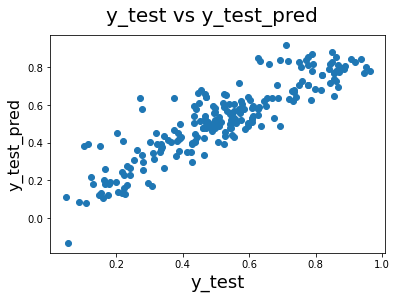

In [294]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [295]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7906228342366496


We can see that the equation of our best fitted line is:

$ cnt = 0.2331  \times  yr + 0.5527 \times temp -0.0780 \times  weathersit\_mist - 0.1553 \times windspeed + 0.0882 \times season\_summer - 0.2795 \times weathersit\_light\_snow + 0.0977 \times mnth\_sep + 0.1294 \times season\_winter + 0.1214 $


## Conclusion
 The following are the significant variables for predicting the demand for shared bikes
- temp
- yr
- windspeed
- seasons summer, winter
- weathersit of mist and lightsnow 
- mnth_sep



1. Rentals are increasing year on year. We can expect increase in rentals going forward in subsequent years
2. If temperatures are high, there is increase in rentals. Supply needs to be there to meet the demand
3. If weathersit is Mist and lightsnow, we can expect decrease in bike rentals. Company can plan accordingly
4. If windspeed is high, there is decrease in demand for bikes. Company can reduce the inventory
5. In seasons summer and winter have positive impact on bike rentals
6. September month have higher impact comparatively to other months. Company can increase the stock to meet the demand



### Additional
####  Error terms are random satisfying the assumption of linear regression model. No visbible pattern is seen
#### Error terms follow homoscedasticity

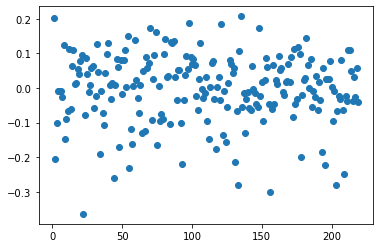

In [296]:
# Test set
res = (y_test - y_test_pred)
x = [i for i in range(1,220,1)]

plt.scatter(x,res)
plt.show()

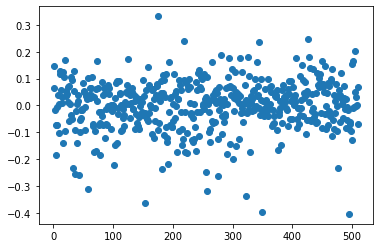

In [297]:
# Training 
res = (y_train - y_train_pred)
x = [i for i in range(1,511,1)]

plt.scatter(x,res)
plt.show()

<AxesSubplot:xlabel='cnt'>

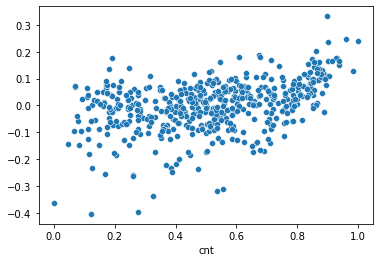

In [298]:
sns.scatterplot(y_train, res)

#### Homoscedasticity is satisfied for error terms 

- Train dataset Adjusted R^2 : 0.824    
- Test dataset Adjusted R^2  : 0.79